In [1]:
# Imports 
import kaggle
import matplotlib.pyplot as plt
import kaggle
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Download and extract dataset
!kaggle datasets download -d jessicali9530/animal-crossing-new-horizons-nookplaza-dataset/
with zipfile.ZipFile('animal-crossing-new-horizons-nookplaza-dataset.zip', 'r') as file:
    file.extract('villagers.csv')
    
villagers = pd.read_csv('villagers.csv')

  0%|                                                | 0.00/577k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 577k/577k [00:00<00:00, 6.38MB/s]


In [2]:
# Check for missing values and data types 
print(villagers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

In [3]:
# Display the first few rows of villagers DataFrame
print(villagers.head())

      Name    Species  Gender Personality    Hobby Birthday Catchphrase  \
0  Admiral       Bird    Male      Cranky   Nature   27-Jan     aye aye   
1  Agent S   Squirrel  Female       Peppy  Fitness    2-Jul    sidekick   
2    Agnes        Pig  Female  Big Sister     Play   21-Apr     snuffle   
3       Al    Gorilla    Male        Lazy  Fitness   18-Oct     ayyyeee   
4  Alfonso  Alligator    Male        Lazy     Play    9-Jun    it'sa me   

   Favorite Song Style 1  Style 2 Color 1 Color 2               Wallpaper  \
0     Steep Hill    Cool     Cool   Black    Blue          dirt-clod wall   
1  Go K.K. Rider  Active   Simple    Blue   Black           concrete wall   
2     K.K. House  Simple  Elegant    Pink   White  gray molded-panel wall   
3  Go K.K. Rider  Active   Active     Red   White           concrete wall   
4    Forest Life  Simple   Simple     Red    Blue    yellow playroom wall   

                 Flooring                                     Furniture List  \
0     

In [4]:
# Analyzing the distribution of favorite songs
song_counts = villagers['Favorite Song'].value_counts()
print("Distribution of Favorite Songs:\n", song_counts)

Distribution of Favorite Songs:
 Favorite Song
Forest Life      15
K.K. Soul        12
K.K. Cruisin'    11
K.K. Stroll      10
Neapolitan        9
                 ..
The K. Funk       1
K.K. Aria         1
K.K. Dixie        1
K.K. Parade       1
K.K. Tango        1
Name: count, Length: 89, dtype: int64


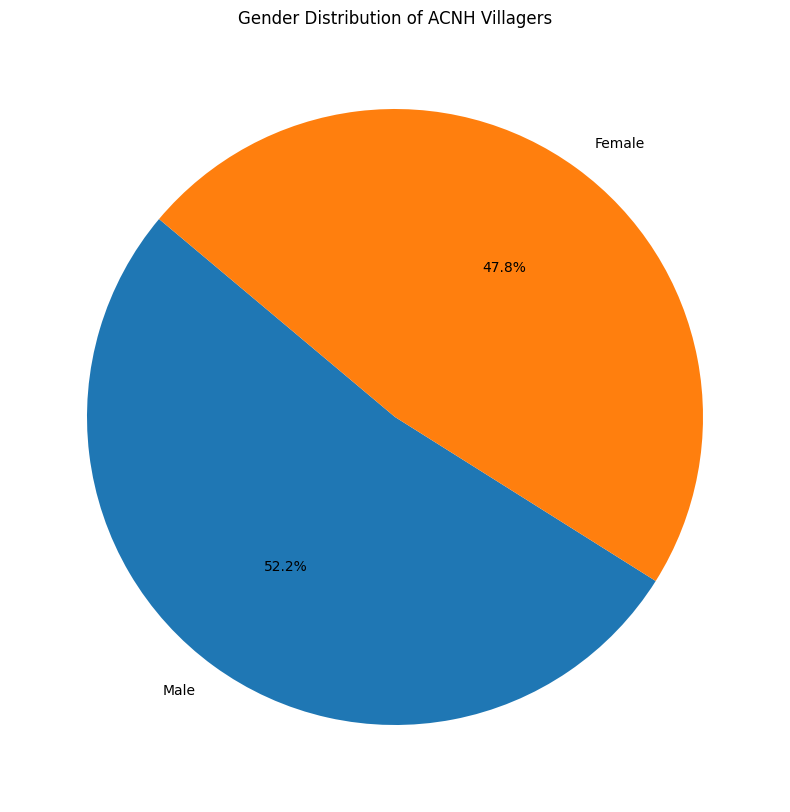

In [5]:
# Calculate gender distribution among villagers
gender_distribution = villagers['Gender'].value_counts()

# Pie chart visualization setup
plt.figure(figsize=(10,10))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of ACNH Villagers')

# Save and show
plt.savefig('Gender_Distribution_ACNH_Villagers.png')
plt.show()

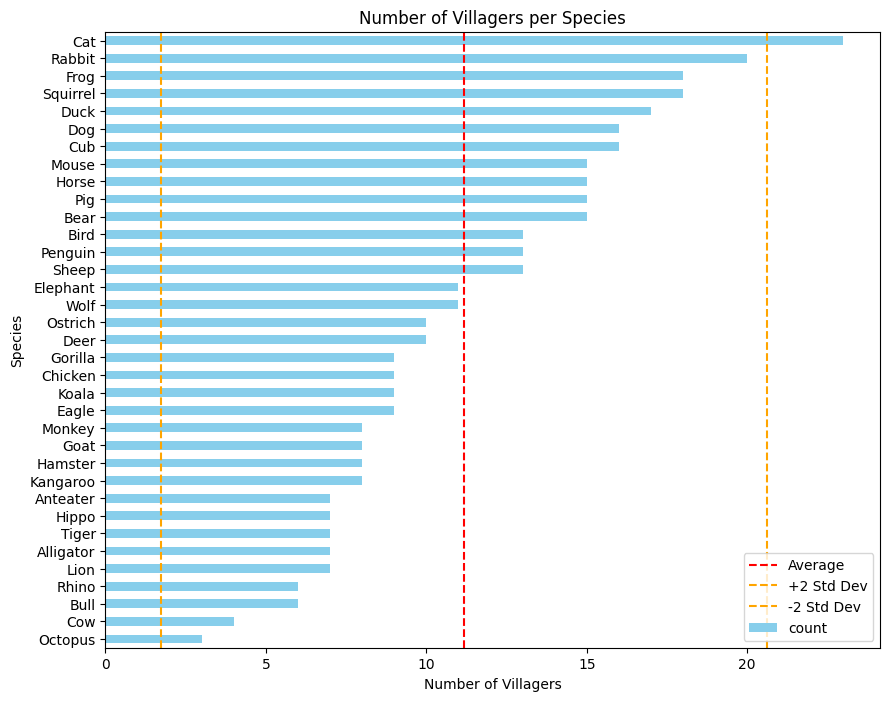

Species
Cat    23
Name: count, dtype: int64

In [6]:
# Calculate the number of villagers per species
species_counts = villagers['Species'].value_counts()

# Calculate the average number of villagers per species
average_villagers_per_species = np.mean(species_counts)

# Calculate standard deviation
std_dev_villagers_per_species = np.std(species_counts)

# Identify outliers: species counts more than two standard deviations from the mean
outliers = species_counts[np.abs(species_counts - average_villagers_per_species) > 2 * std_dev_villagers_per_species]

# Create a horizontal bar chart for species counts
plt.figure(figsize=(10, 8))
species_counts.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=average_villagers_per_species, color='red', linestyle='--', label='Average')
plt.axvline(x=average_villagers_per_species + 2 * std_dev_villagers_per_species, color='orange', linestyle='--', label='+2 Std Dev')
plt.axvline(x=average_villagers_per_species - 2 * std_dev_villagers_per_species, color='orange', linestyle='--', label='-2 Std Dev')
plt.xlabel('Number of Villagers')
plt.title('Number of Villagers per Species')
plt.legend()
plt.savefig('Number_of_Villagers_by_Species.png')
plt.show()

# Print the species considered as outliers
outliers

/var/folders/n9/nhw5lfp14pz9_5f7p9093sd80000gn/T/ipykernel_55655/3478278280.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette="viridis")


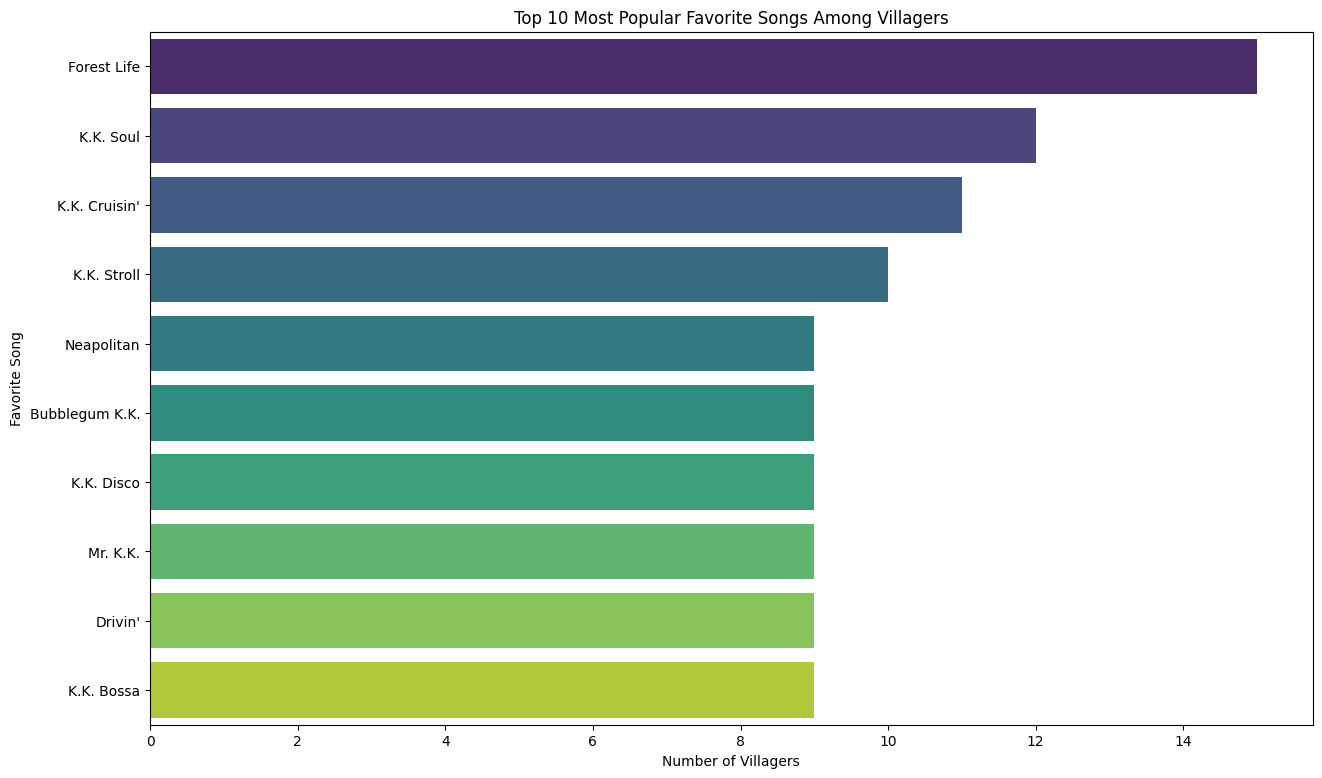

In [7]:
# Visualizing the top favorite songs, selecting top 10
top_songs = song_counts.head(10)

# Plotting
plt.figure(figsize=(15, 9))
sns.barplot(x=top_songs.values, y=top_songs.index, palette="viridis")
plt.xlabel('Number of Villagers')
plt.ylabel('Favorite Song')
plt.title('Top 10 Most Common Favorite Songs Among Villagers')

# Save the figure 
plt.savefig('favorite_songs_villagers.png', bbox_inches='tight')

plt.show()

/var/folders/n9/nhw5lfp14pz9_5f7p9093sd80000gn/T/ipykernel_55655/3298597108.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_female_songs.values, y=top_female_songs.index, palette="coolwarm")
/var/folders/n9/nhw5lfp14pz9_5f7p9093sd80000gn/T/ipykernel_55655/3298597108.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_male_songs.values, y=top_male_songs.index, palette="coolwarm")


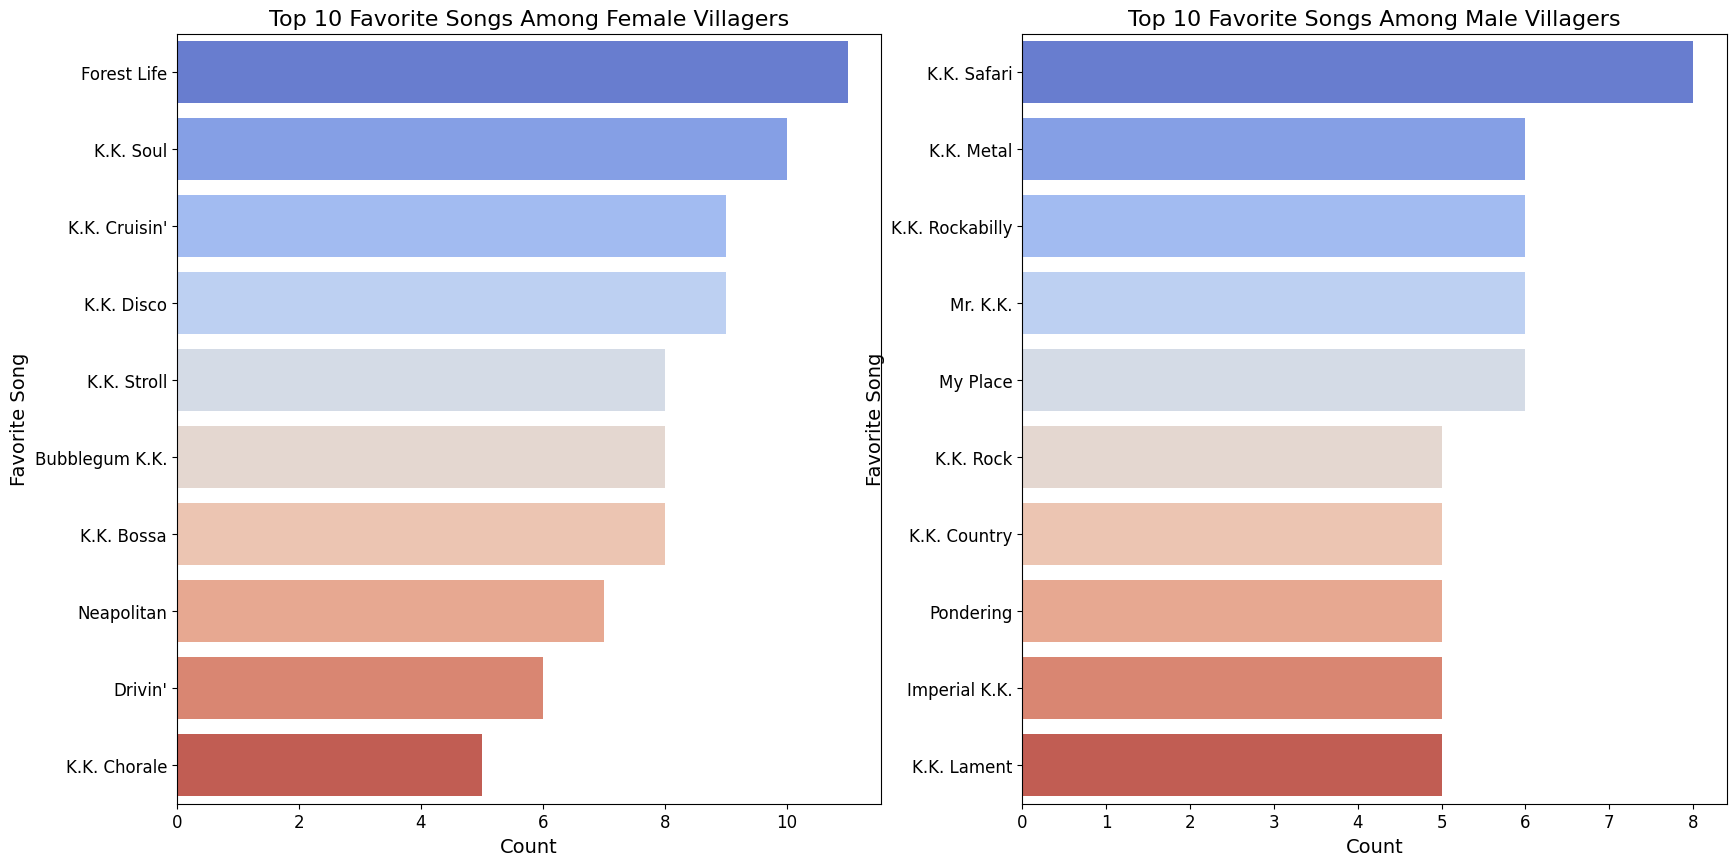

In [8]:
# Analyzing song preferences by gender
# Create separate DataFrames by gender
top_female_songs = villagers[villagers['Gender'] == 'Female']['Favorite Song'].value_counts().head(10)
top_male_songs = villagers[villagers['Gender'] == 'Male']['Favorite Song'].value_counts().head(10)

# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=False) 

# Plot female villagers top 10 songs
sns.barplot(ax=axes[0], x=top_female_songs.values, y=top_female_songs.index, palette="coolwarm")
axes[0].set_title('Top 10 Favorite Songs Among Female Villagers', fontsize=16)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Favorite Song', fontsize=14)
axes[0].tick_params(labelsize=12)  # Adjust the size of the ticks

# Plot male villagers top 10 songs
sns.barplot(ax=axes[1], x=top_male_songs.values, y=top_male_songs.index, palette="coolwarm")
axes[1].set_title('Top 10 Favorite Songs Among Male Villagers', fontsize=16)
axes[1].set_xlabel('Count', fontsize=14)
axes[1].set_ylabel('Favorite Song', fontsize=14)  
axes[1].tick_params(labelsize=12)

# Display and save
plt.savefig('favorite_songs_by_gender.png', bbox_inches='tight')
plt.show()